In [2]:
# Import necessary tools  
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns 

%matplotlib inline

In [3]:
# Establish csv files for python 
whale_csv_path = Path("Resources/whale_returns.csv")
algo_csv_path = Path("Resources/algo_returns.csv")
tsx_csv_path = Path("Resources/sp_tsx_history.csv")

In [4]:
# Create varibles for python to be able to use and analyse
whale_df = pd.read_csv(whale_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(algo_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
tsx_df = pd.read_csv(tsx_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [5]:
# Check for nulls
tsx_df.isnull().sum()

Close    0
dtype: int64

In [6]:
# Drop any nulls from the appropriate data frame
algo_df = algo_df.dropna().copy()
whale_df = whale_df.dropna().copy()

In [7]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Clean the TSX data frame, by getting rid of $, blank spaces and commas
tsx_df['Close'] = tsx_df['Close'].str.replace("$", " ")
tsx_df['Close'] = tsx_df['Close'].str.replace(",", "")
tsx_df['Close'] = tsx_df['Close'].astype('float')

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [11]:
# Confirm all dataframes are the same dtype so the data can be combined 
tsx_df.dtypes

Close    float64
dtype: object

In [12]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [13]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [23]:
# Confrim no nulls from new data and rename the column to reflect the new type of information
tsx_daily_returns = tsx_df.pct_change()
tsx_daily_returns.isnull().sum()
tsx_df.rename(columns = {'Close' : 'TSX Daily'}, inplace = True)

In [24]:
tsx_daily_returns = tsx_daily_returns.dropna().copy()
tsx_daily_returns.isnull().sum()

TSX Daily    0
dtype: int64

In [25]:
# Check datadrame for duplicates
whale_df = whale_df.drop_duplicates().copy()
whale_df.duplicated().sum()

0

In [26]:
combined_df = pd.concat([whale_df, algo_df, tsx_daily_returns], axis="columns", join="inner")
combined_df.sort_index(inplace=True)

In [27]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Daily
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

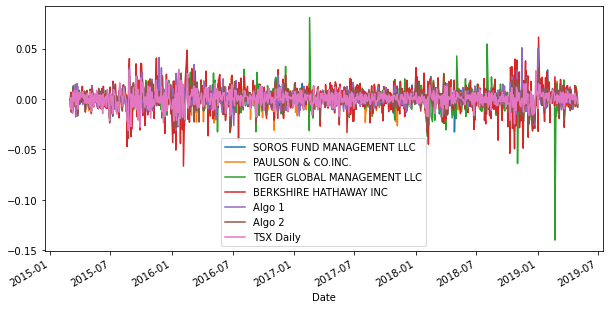

In [28]:
combined_df.plot(figsize=(10,5))

In [29]:
# Create individual data frames for each portfolio to be able to calculate daily returns for comparison
soros_returns = combined_df['SOROS FUND MANAGEMENT LLC']
paulson_returns = combined_df['PAULSON & CO.INC. ']
tiger_returns = combined_df['TIGER GLOBAL MANAGEMENT LLC']
BH_returns = combined_df['BERKSHIRE HATHAWAY INC']
Algo1_returns = combined_df['Algo 1']
Algo2_returns = combined_df['Algo 2']
tsx_returns = combined_df ['TSX Daily']

<AxesSubplot:xlabel='Date'>

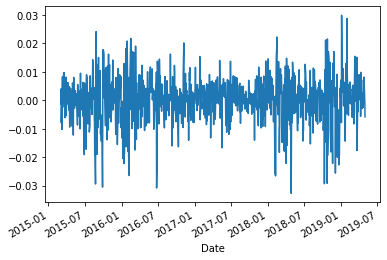

In [30]:
soros_returns.plot()

<AxesSubplot:xlabel='Date'>

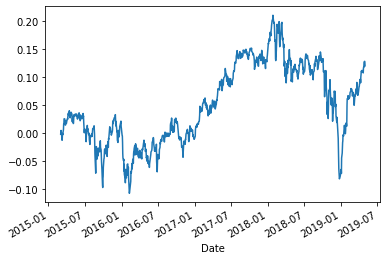

In [31]:
soros_cum = (1 + soros_returns).cumprod() - 1
soros_cum.plot()

<AxesSubplot:xlabel='Date'>

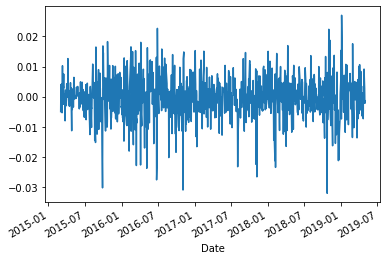

In [32]:
paulson_returns.plot()

<AxesSubplot:xlabel='Date'>

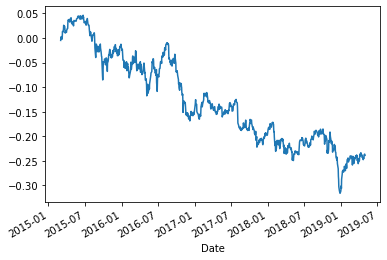

In [33]:
paulson_cum = (1 + paulson_returns).cumprod() - 1
paulson_cum.plot()

<AxesSubplot:xlabel='Date'>

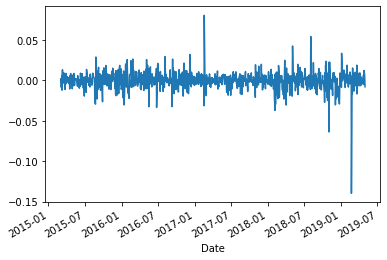

In [34]:
tiger_returns.plot()

<AxesSubplot:xlabel='Date'>

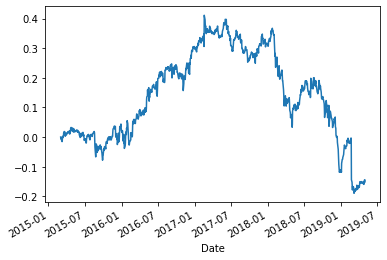

In [35]:
tiger_cum = (1 + tiger_returns).cumprod() - 1
tiger_cum.plot()

<AxesSubplot:xlabel='Date'>

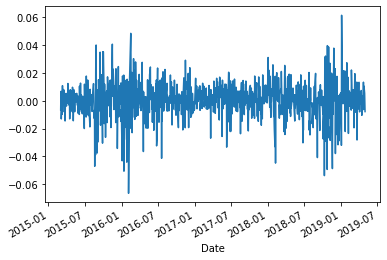

In [36]:
BH_returns.plot()

<AxesSubplot:xlabel='Date'>

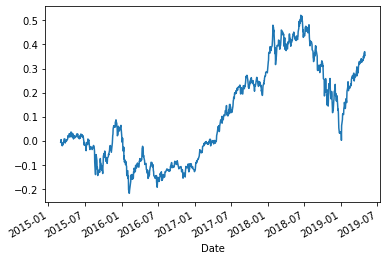

In [37]:
BH_cum = (1 + BH_returns).cumprod() - 1
BH_cum.plot()

<AxesSubplot:xlabel='Date'>

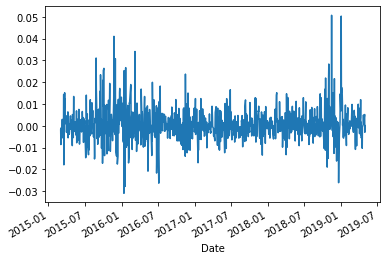

In [38]:
Algo1_returns.plot()

<AxesSubplot:xlabel='Date'>

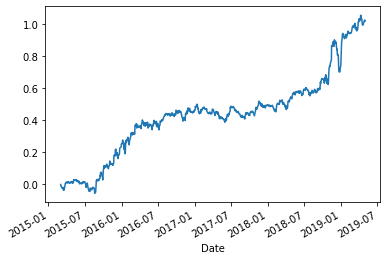

In [39]:
Algo1_cum = (1 + Algo1_returns).cumprod() - 1
Algo1_cum.plot()

<AxesSubplot:xlabel='Date'>

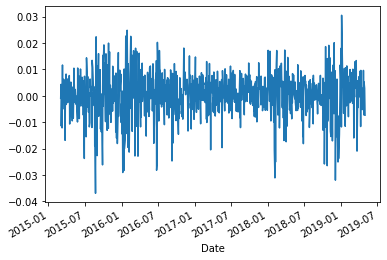

In [40]:
Algo2_returns.plot()

<AxesSubplot:xlabel='Date'>

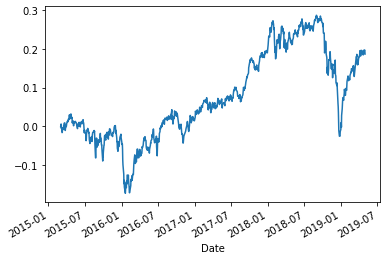

In [41]:
Algo2_cum = (1 + Algo2_returns).cumprod() - 1
Algo2_cum.plot()

<AxesSubplot:xlabel='Date'>

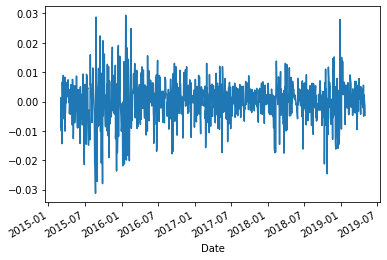

In [42]:
tsx_returns.plot()

<AxesSubplot:xlabel='Date'>

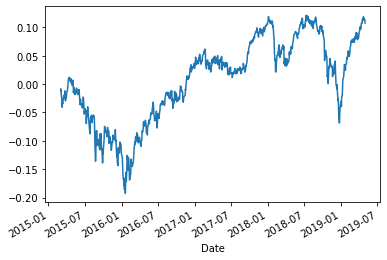

In [43]:
tsx_cum = (1 + tsx_returns).cumprod() - 1
tsx_cum.plot()

In [215]:
# The best performing portfolio was Algorithmic 1 . This portfolio saw a return of ~1.0% for the time frame. 
# This outperformed the TSX 60 – which retuned ~0.1% for the given time frame. 

# Three additional portfolios, Berkshire Hathaway ~ 0.4%, Algo 2 ~ 0.2% and Soros ~ 0.15%, also outperformed the TSX 500. 
# Tiger Global ~ - 0.15% and Paulson ~ - 0.25% each had a negative return for the time period.  


In [45]:
cumulative_df = (1 + combined_df).cumprod()
cumulative_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Daily
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

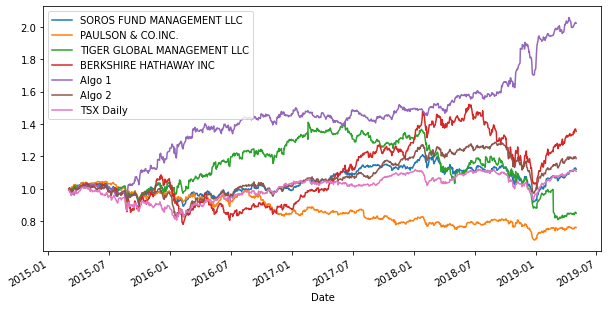

In [46]:
cumulative_df.plot(figsize=(10,5))

<AxesSubplot:>

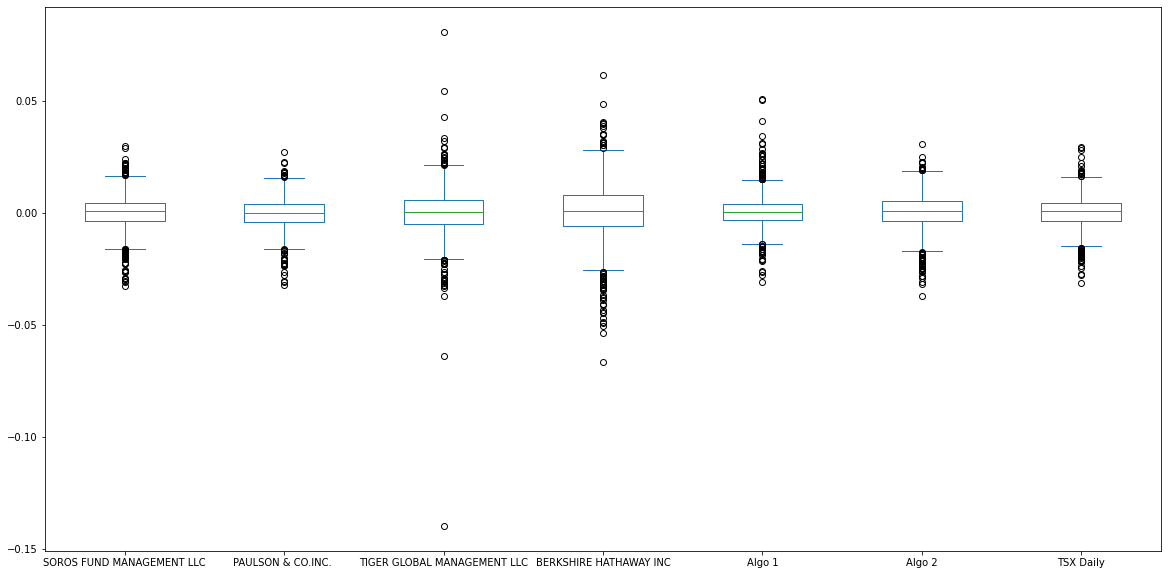

In [47]:
combined_df.plot.box(figsize=(20,10))

In [48]:
# Calculate standard deviation for all portfolios
daily_std = combined_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.013004
TIGER GLOBAL MANAGEMENT LLC    0.011034
Algo 2                         0.008299
SOROS FUND MANAGEMENT LLC      0.007936
Algo 1                         0.007640
PAULSON & CO.INC.              0.007079
TSX Daily                      0.007023
dtype: float64

In [213]:
# The TSX 60 has a standard deviation of 0.007023, therefore if any portfolio has a standard deviation greater than 0.007023,
# this implies the portfolio in question has higher perceived risk.
# In fact, all portfolios have a standard deviation greater than 0.007023 

In [50]:
# Calculate the annualized standard deviation for all portfolios
annualised_std = daily_std * np.sqrt(252)
annualised_std

BERKSHIRE HATHAWAY INC         0.206427
TIGER GLOBAL MANAGEMENT LLC    0.175161
Algo 2                         0.131741
SOROS FUND MANAGEMENT LLC      0.125986
Algo 1                         0.121282
PAULSON & CO.INC.              0.112380
TSX Daily                      0.111480
dtype: float64

In [51]:
# Plot the 21 day rolling standard deviation
rolling_std = combined_df.rolling(window=21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Daily
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:xlabel='Date'>

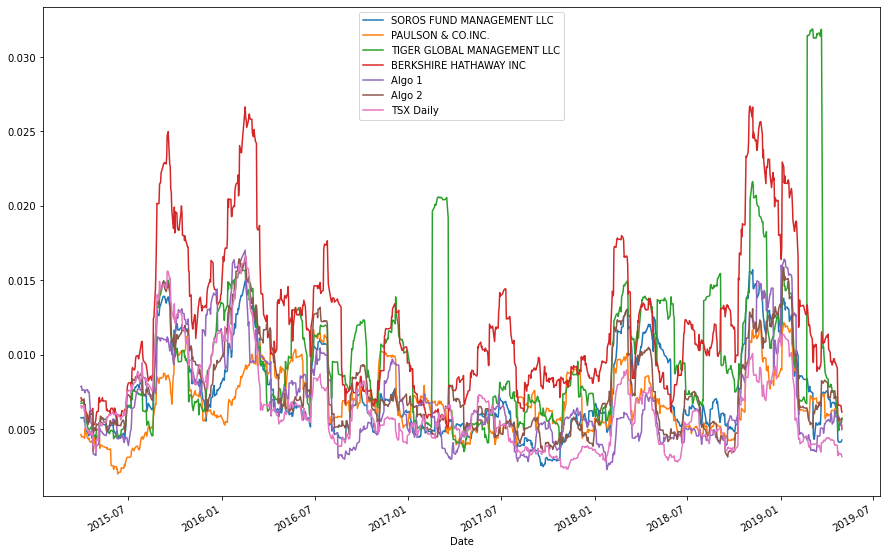

In [52]:
rolling_std.plot(figsize=(15,10))

In [53]:
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Daily
SOROS FUND MANAGEMENT LLC,1.000000,0.697108,0.560972,0.750178,0.315982,0.840945,0.684323
PAULSON & CO.INC.,0.697108,1.000000,0.433033,0.540077,0.268351,0.685651,0.494296
TIGER GLOBAL MANAGEMENT LLC,0.560972,0.433033,1.000000,0.423537,0.162406,0.515432,0.447497
BERKSHIRE HATHAWAY INC,0.750178,0.540077,0.423537,1.000000,0.291365,0.696443,0.565764
Algo 1,0.315982,0.268351,0.162406,0.291365,1.000000,0.283128,0.307919
Algo 2,0.840945,0.685651,0.515432,0.696443,0.283128,1.000000,0.740267
TSX Daily,0.684323,0.494296,0.447497,0.565764,0.307919,0.740267,1.000000


<AxesSubplot:>

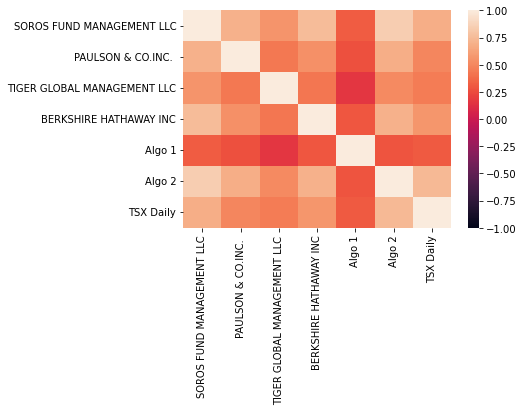

In [54]:
sns.heatmap(correlation, vmin = -1, vmax = 1)

<AxesSubplot:>

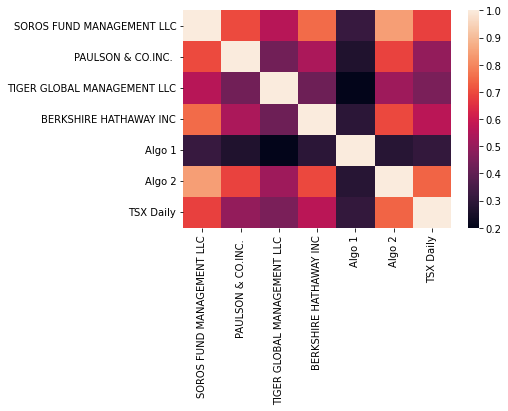

In [55]:
sns.heatmap(correlation, vmin = 0.2, vmax = 1)

In [56]:
# Calculate covariance of a single portfolio 
covariance = BH_returns.cov(tsx_returns)

In [57]:
# Calculate variance of S&P TSX
variance = tsx_returns.var()

In [58]:
BH_beta = covariance / variance
BH_beta

1.047618828291925

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Berkshire Hathaway'}, xlabel='Date'>

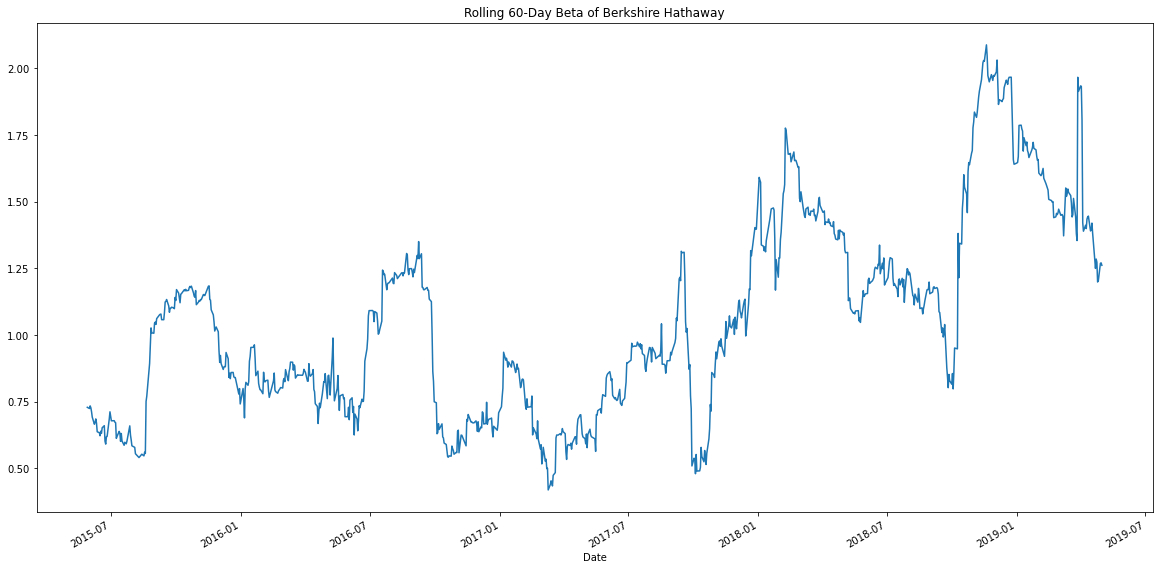

In [59]:
BH_rolling_covariance = BH_returns.rolling(window=60).cov(tsx_returns)
BH_rolling_variance = tsx_returns.rolling(window=60).var()
rolling_beta = BH_rolling_covariance / BH_rolling_variance

rolling_beta.plot(figsize = (20,10), title="Rolling 60-Day Beta of Berkshire Hathaway")

In [60]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.290688
PAULSON & CO.INC.             -0.555201
TIGER GLOBAL MANAGEMENT LLC   -0.146460
BERKSHIRE HATHAWAY INC         0.473532
Algo 1                         1.521602
Algo 2                         0.393500
TSX Daily                      0.286526
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

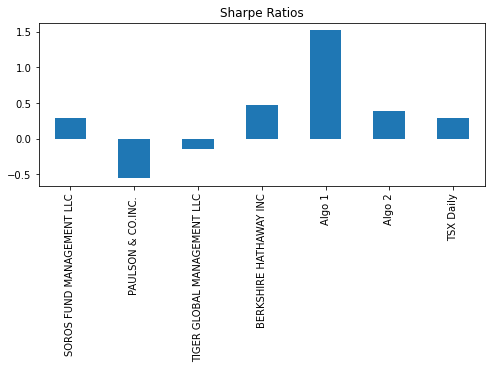

In [61]:
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios", figsize=(8,3))

In [62]:
# TSX 60 has a Sharpe Ratio of 0.286526. Two of the whale portfolios have higher ratios, 
# that of Berkshire Hathaway and Soros – however Soros by a minimal margin. 
# Paulson and Tiger have negative Sharpe ratios which is very poor compared to the TSX 60. 
# However, both algorithmic portfolios have higher Sharpe ratios by a large margin to that of the TSX 60. 
# Algo 1 specifically with a Sharpe ratio of 1.521602 outperfoming all portfolios

In [146]:
# Read in 3 stock data sets of your choice.

l_csv_path = Path("Resources/l_historical.csv")
otex_csv_path = Path("Resources/otex_historical.csv")
shop_csv_path = Path("Resources/shop_historical.csv")

l_df = pd.read_csv(l_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_df = pd.read_csv(otex_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_df = pd.read_csv(shop_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [147]:
l_df.head()

,Symbol,Close2
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [148]:
otex_df.head()

,Symbol,Close1
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [149]:
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [157]:
mystock_df = pd.concat([l_df, otex_df, shop_df], axis="columns", join="inner")


In [158]:
mystock_df.head()

,Symbol,Close2,Symbol,Close1,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [159]:
mystock_df = mystock_df.drop(columns = "Symbol")

In [170]:
mystock_df.rename(columns={"Close2": "L", "Close1": "OTEX", "Close": "SHOP"}, inplace = True)
mystock_df.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [173]:
my_port_returns = mystock_df.pct_change().dropna()
my_port_returns

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


In [177]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns_weighted = my_port_returns.dot(weights)
my_portfolio_returns_weighted.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

In [180]:
new_all_returns = pd.concat([combined_df, my_portfolio_returns_weighted], axis="columns", join="inner")
new_all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX Daily,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [182]:
new_columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX", "My Portfolio"]
new_all_returns.columns = new_columns
new_all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [183]:
new_all_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
Algo 1                         0.0
Algo 2                         0.0
S&P TSX                        0.0
My Portfolio                   0.0
dtype: float64

In [184]:
new_all_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
My Portfolio                   0
dtype: int64

In [185]:
new_daily_std = new_all_returns.std()
new_daily_std

SOROS FUND MANAGEMENT LLC      0.009262
PAULSON & CO.INC.              0.007270
TIGER GLOBAL MANAGEMENT LLC    0.013976
BERKSHIRE HATHAWAY INC         0.014461
Algo 1                         0.007608
Algo 2                         0.008716
S&P TSX                        0.006280
My Portfolio                   0.014208
dtype: float64

In [186]:
new_annualised_std = new_daily_std * np.sqrt(252)
new_annualised_std

SOROS FUND MANAGEMENT LLC      0.147030
PAULSON & CO.INC.              0.115406
TIGER GLOBAL MANAGEMENT LLC    0.221862
BERKSHIRE HATHAWAY INC         0.229561
Algo 1                         0.120767
Algo 2                         0.138357
S&P TSX                        0.099685
My Portfolio                   0.225542
dtype: float64

In [187]:
new_rolling_std = new_all_returns.rolling(window=21).std()
new_rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.008253
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.008231
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.007718


<AxesSubplot:xlabel='Date'>

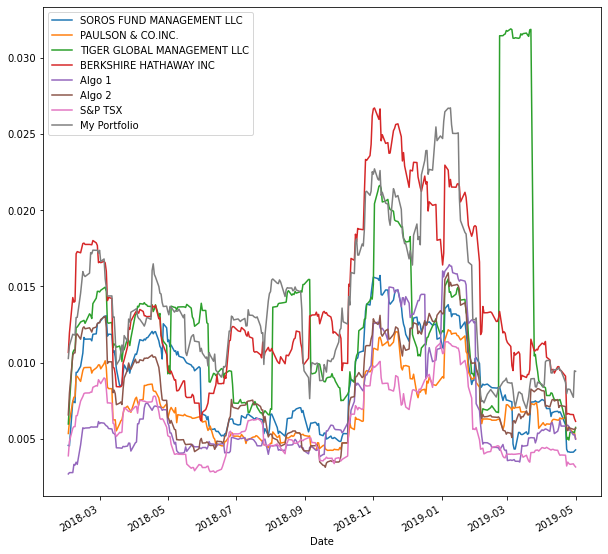

In [188]:
new_rolling_std.plot(figsize=(10,10))

In [189]:
new_correlation = new_all_returns.corr()
new_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764176,0.526739,0.782417,0.306522,0.837952,0.689138,0.558313
PAULSON & CO.INC.,0.764176,1.000000,0.536534,0.647417,0.321756,0.800784,0.625942,0.386942
TIGER GLOBAL MANAGEMENT LLC,0.526739,0.536534,1.000000,0.384364,0.131914,0.486999,0.440294,0.305591
BERKSHIRE HATHAWAY INC,0.782417,0.647417,0.384364,1.000000,0.295526,0.786631,0.652161,0.649914
Algo 1,0.306522,0.321756,0.131914,0.295526,1.000000,0.322722,0.283740,0.215756
Algo 2,0.837952,0.800784,0.486999,0.786631,0.322722,1.000000,0.755307,0.566994
S&P TSX,0.689138,0.625942,0.440294,0.652161,0.283740,0.755307,1.000000,0.581368
My Portfolio,0.558313,0.386942,0.305591,0.649914,0.215756,0.566994,0.581368,1.000000


<AxesSubplot:>

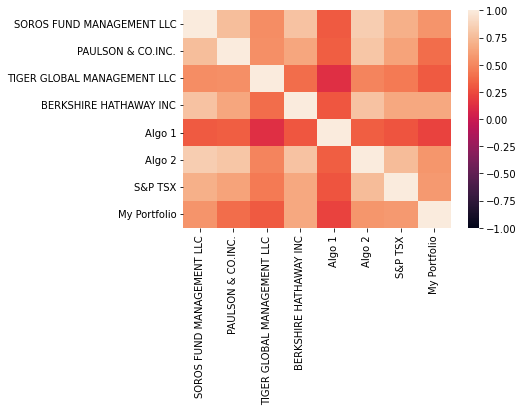

In [190]:
import seaborn as sns
sns.heatmap(new_correlation, vmin = -1, vmax = 1)

<AxesSubplot:>

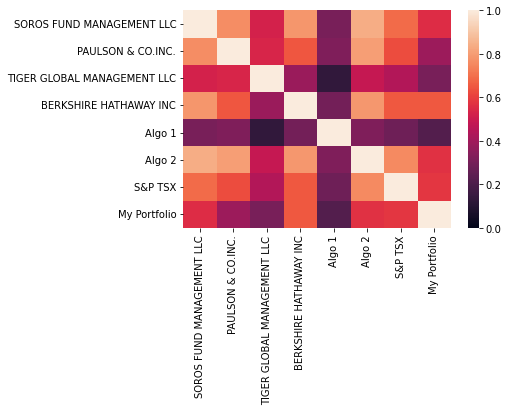

In [191]:
sns.heatmap(new_correlation, vmin = 0, vmax = 1)

In [192]:
my_portfolio_covariance = new_all_returns["My Portfolio"].cov(new_all_returns["S&P TSX"])
my_portfolio_covariance

5.186921847723972e-05

In [193]:
variance = new_all_returns["S&P TSX"].var()
variance

3.943325271289693e-05

In [194]:
my_portfolio_beta = my_portfolio_covariance / variance
my_portfolio_beta

1.3153674857837816

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

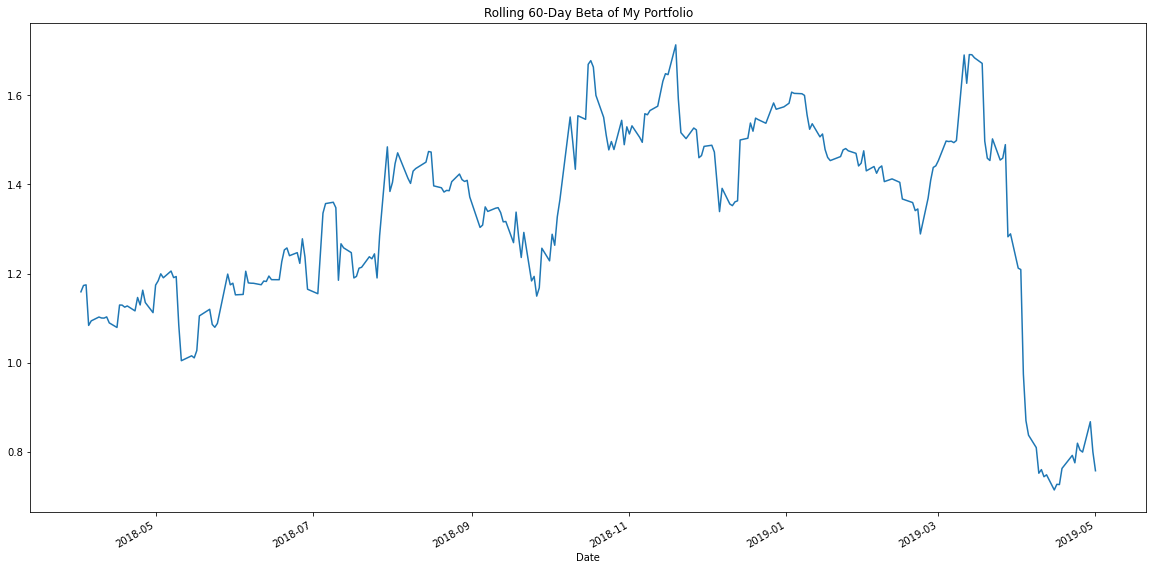

In [195]:
my_portfolio_rolling_covariance = new_all_returns["My Portfolio"].rolling(window=60).cov(new_all_returns["S&P TSX"])
new_rolling_variance = new_all_returns["S&P TSX"].rolling(window=60).var()
new_rolling_beta = my_portfolio_rolling_covariance / new_rolling_variance

new_rolling_beta.plot(figsize = (20,10), title="Rolling 60-Day Beta of My Portfolio")

In [196]:
new_sharpe_ratios = (new_all_returns.mean() * 252) / (new_all_returns.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.089011
PAULSON & CO.INC.             -0.399948
TIGER GLOBAL MANAGEMENT LLC   -1.404579
BERKSHIRE HATHAWAY INC         0.197718
Algo 1                         2.006268
Algo 2                        -0.042159
S&P TSX                        0.017901
My Portfolio                   1.627444
dtype: float64

<AxesSubplot:title={'center':'New Sharpe Ratios'}>

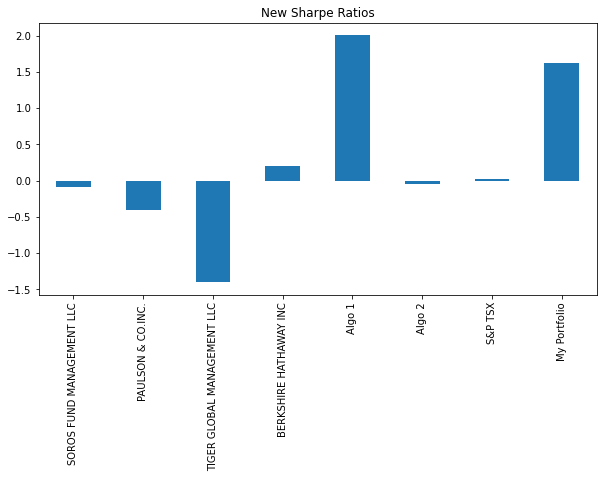

In [197]:
new_sharpe_ratios.plot(kind="bar", title = "New Sharpe Ratios", figsize=(10,5))

In [207]:
# My portfolio which consists of L (Loblaw Companies), SHOP (Shopify) and OTEX (OpenText) 
# had medium level of correlation to the TSX 60 - 0.581368. 
# It also had mixed correlation with the other portfolios. 


In [203]:
# My portfolio has a relatively low perceived volatility with the standard deviation being 0.225542

In [210]:
# As my portfolios Beta is >1 (1.3153674857837816) this indicates my portfolio is more volatile that the market – TSX 60.
# This is understandable as 2/3’s of my portfolio are tech stocks which can inherent more volatility than other sectors.

In [211]:
# My portfolios Sharpe Ratio is >1 (1.627444) which indicates it has extremely well outperformed the market – TSX 60. 

In [212]:
# My portfolio is a lucky case of assuming greater risk (Beta greater than 1) 
# but being fortunate enough to be rewarded for extra inherent risk (Sharpe ratio much greater than 1)